1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.



In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.datasets import load_iris

In [447]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data 
target = iris.target 
names = iris.target_names
df = pd.DataFrame(X, columns=["sepal_lenght", "sepal_width", "petal_lenght", "petal_width"])
df['target'] = iris.target
# df['target'] = df['target'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
df.head(3)

,sepal_lenght,sepal_width,petal_lenght,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_lenght  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [449]:
df.columns

Index(['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'target'], dtype='object')

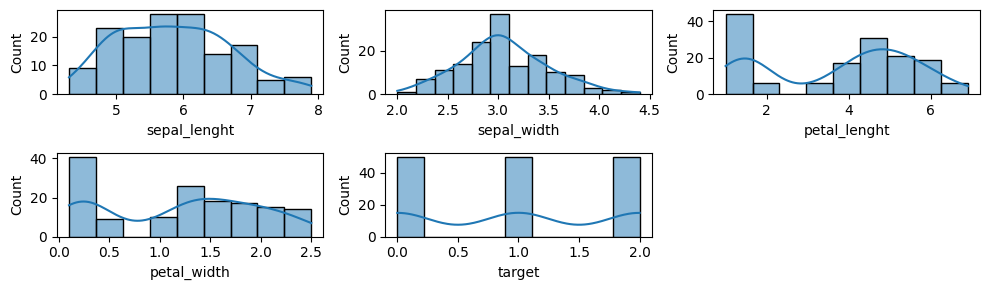

In [450]:
# Визуализация гистограмм
plt.figure(figsize=(10, 3))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

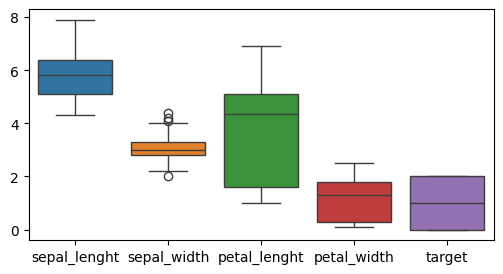

In [451]:
fig, ax = plt.subplots(figsize=(6,3))
sns.boxplot(data= df, ax=ax)
plt.show()

### выбросов нет
### есть дисбаланс в petal

In [452]:
X = df.drop('target', axis=1)
Y = df['target']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 77)

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. 



In [454]:
# обучение логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
Y_pred_train = log_reg.predict(X_train)
Y_pred_test = log_reg.predict(X_test)


Оцените её качество на тренировочных и тестовых данных.


In [455]:
# функция для печать результатов логистической регрессии

def lg_scores(y, y_pred, rounded=3, average='weighted') -> dict:
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
    scores = dict({"accuracy": round(float(accuracy_score(y, y_pred)), rounded),
                   "recall": round(float(precision_score(y, y_pred, average=average, zero_division=1)), rounded),
                   "precision": round(float(recall_score(y, y_pred, average=average)), rounded),
                   "f1": round(float(f1_score(y, y_pred, average=average)), rounded),
                   "R2": round(float(r2_score(y, y_pred)), rounded)})
    return scores

In [456]:
# Вывод результатов
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"На тренировочных данных:{lg_scores(y_train, Y_pred_train)}")
print(f"На тестовых данных:{lg_scores(y_test, Y_pred_test)}")

На тренировочных данных:{'accuracy': 0.983, 'recall': 0.984, 'precision': 0.983, 'f1': 0.983, 'R2': 0.974}
На тестовых данных:{'accuracy': 0.867, 'recall': 0.911, 'precision': 0.867, 'f1': 0.868, 'R2': 0.814}


— Повторите шаг с добавлением L1- и L2-регуляризации. 

In [457]:
# обучение логистическая регрессия (L1)
log_reg_l1 = LogisticRegression(penalty="l1", solver="liblinear")
log_reg_l1.fit(X_train, y_train)
Y_pred_train = log_reg_l1.predict(X_train)
Y_pred_test = log_reg_l1.predict(X_test)
print(f"На тренировочных данных (L1):{lg_scores(y_train, Y_pred_train)}")
print(f"На тестовых данных (L1):{lg_scores(y_test, Y_pred_test)}")

На тренировочных данных (L1):{'accuracy': 0.967, 'recall': 0.97, 'precision': 0.967, 'f1': 0.967, 'R2': 0.949}
На тестовых данных (L1):{'accuracy': 0.833, 'recall': 0.897, 'precision': 0.833, 'f1': 0.84, 'R2': 0.767}


In [458]:
# обучение логистическая регрессия (L2)
log_reg_l2 = LogisticRegression(penalty="l2", solver="liblinear")
log_reg_l2.fit(X_train, y_train)
Y_pred_train = log_reg_l2.predict(X_train)
Y_pred_test = log_reg_l2.predict(X_test)
print(f"На тренировочных данных (L2):{lg_scores(y_train, Y_pred_train)}")
print(f"На тестовых данных (L2):{lg_scores(y_test, Y_pred_test)}")

На тренировочных данных (L2):{'accuracy': 0.925, 'recall': 0.93, 'precision': 0.925, 'f1': 0.925, 'R2': 0.884}
На тестовых данных (L2):{'accuracy': 0.767, 'recall': 0.829, 'precision': 0.767, 'f1': 0.775, 'R2': 0.674}


#### разница при проверки на train (0.9) и test(0.7) говорит о переобучении модели

In [459]:
# создадим две таблицы для внесения показателей для проверки моделей на тесте и трейне
df_score_test = pd.DataFrame(columns=['accuracy', 'recall', 'precision', 'f1', 'R2', 'alpha'])
df_score_train = df_score_test.copy()
df_score_test.head()

,accuracy,recall,precision,f1,R2,alpha


In [460]:
# Параметры регуляризации (L1) для тестирования 
cs_list = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
rows_test = []
rows_train = []

for c in cs_list:
    
    log_reg_l1 = LogisticRegression(penalty="l1", solver="liblinear", C=c)
    log_reg_l1.fit(X_train, y_train)
    Y_pred_train = log_reg_l1.predict(X_train)
    Y_pred_test = log_reg_l1.predict(X_test)

    temp_dict_test = {}
    temp_dict_test.update(lg_scores(y_test, Y_pred_test))
    temp_dict_test.update({'alpha': c})
    rows_test.append(temp_dict_test)

    temp_dict_train = {}
    temp_dict_train.update(lg_scores(y_train, Y_pred_train))
    temp_dict_train.update({'alpha': c})
    rows_train.append(temp_dict_train)
    print(f"На тренировочных данных (L1) C={c}:{lg_scores(y_train, Y_pred_train)}")
    print(f"На тестовых данных (L1) C={c}:{lg_scores(y_test, Y_pred_test)}")
df_score_test = df_score_test.from_dict(rows_test)
df_score_train = df_score_train.from_dict(rows_train)

На тренировочных данных (L1) C=0.01:{'accuracy': 0.342, 'recall': 0.775, 'precision': 0.342, 'f1': 0.174, 'R2': -1.44}
На тестовых данных (L1) C=0.01:{'accuracy': 0.3, 'recall': 0.79, 'precision': 0.3, 'f1': 0.138, 'R2': -1.795}
На тренировочных данных (L1) C=0.1:{'accuracy': 0.892, 'recall': 0.905, 'precision': 0.892, 'f1': 0.891, 'R2': 0.833}
На тестовых данных (L1) C=0.1:{'accuracy': 0.833, 'recall': 0.86, 'precision': 0.833, 'f1': 0.836, 'R2': 0.767}
На тренировочных данных (L1) C=1.0:{'accuracy': 0.967, 'recall': 0.97, 'precision': 0.967, 'f1': 0.967, 'R2': 0.949}
На тестовых данных (L1) C=1.0:{'accuracy': 0.833, 'recall': 0.897, 'precision': 0.833, 'f1': 0.84, 'R2': 0.767}
На тренировочных данных (L1) C=10.0:{'accuracy': 0.983, 'recall': 0.984, 'precision': 0.983, 'f1': 0.983, 'R2': 0.974}
На тестовых данных (L1) C=10.0:{'accuracy': 0.867, 'recall': 0.911, 'precision': 0.867, 'f1': 0.868, 'R2': 0.814}
На тренировочных данных (L1) C=100.0:{'accuracy': 1.0, 'recall': 1.0, 'precisio

In [461]:
print(df_score_test)

   accuracy  recall  precision     f1     R2    alpha
0     0.300   0.790      0.300  0.138 -1.795     0.01
1     0.833   0.860      0.833  0.836  0.767     0.10
2     0.833   0.897      0.833  0.840  0.767     1.00
3     0.867   0.911      0.867  0.868  0.814    10.00
4     0.900   0.905      0.900  0.901  0.860   100.00
5     0.900   0.905      0.900  0.901  0.860  1000.00


In [462]:
# to float converter
def df_obj_2float(my_df: pd.DataFrame) -> pd.DataFrame:
    columns_list = my_df.columns
    for col in columns_list:
        my_df[col] = my_df[col].astype('float')
    return my_df

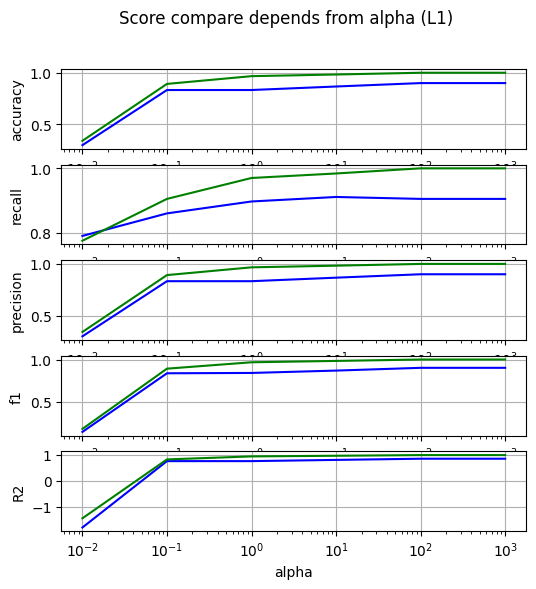

In [463]:
# нарисуем показатели в зависимости от коэффициента регуляризациим для (L1)
import matplotlib.pyplot as plt
import seaborn as sns
columns_list = ['accuracy', 'recall', 'precision', 'f1', 'R2']
fig, ax = plt.subplots(nrows=len(columns_list), ncols=1, figsize=(6, 6))
fig.suptitle('Score compare depends from alpha (L1)')
for i, col in enumerate(columns_list):
    ax[i].plot(df_score_test['alpha'], df_score_test[col], 'b-')
    ax[i].plot(df_score_train['alpha'], df_score_train[col], 'g-')
    ax[i].set_xlabel('alpha')
    ax[i].set_ylabel(col)
    ax[i].grid()
    ax[i].set_xscale('log')
plt.show()

#### модель на тестовых данных (синяя) показывает худшие результаты. при этом высокий коэффициент регуляризации (L1>100) ухудшает показатели

In [464]:
# Параметры регуляризации (L2) для тестирования 
cs_list = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
rows_test = []
rows_train = []

for c in cs_list:
    
    log_reg_l1 = LogisticRegression(penalty="l2", solver="liblinear", C=c)
    log_reg_l1.fit(X_train, y_train)
    Y_pred_train = log_reg_l1.predict(X_train)
    Y_pred_test = log_reg_l1.predict(X_test)

    temp_dict_test = {}
    temp_dict_test.update(lg_scores(y_test, Y_pred_test))
    temp_dict_test.update({'alpha': c})
    rows_test.append(temp_dict_test)

    temp_dict_train = {}
    temp_dict_train.update(lg_scores(y_train, Y_pred_train))
    temp_dict_train.update({'alpha': c})
    rows_train.append(temp_dict_train)
    print(f"На тренировочных данных (L2) C={c}:{lg_scores(y_train, Y_pred_train)}")
    print(f"На тестовых данных (L2) C={c}:{lg_scores(y_test, Y_pred_test)}")
df_score_test = df_score_test.from_dict(rows_test)
df_score_train = df_score_train.from_dict(rows_train)

На тренировочных данных (L2) C=0.01:{'accuracy': 0.85, 'recall': 0.899, 'precision': 0.85, 'f1': 0.844, 'R2': 0.769}
На тестовых данных (L2) C=0.01:{'accuracy': 0.767, 'recall': 0.773, 'precision': 0.767, 'f1': 0.769, 'R2': 0.674}
На тренировочных данных (L2) C=0.1:{'accuracy': 0.858, 'recall': 0.866, 'precision': 0.858, 'f1': 0.858, 'R2': 0.782}
На тестовых данных (L2) C=0.1:{'accuracy': 0.8, 'recall': 0.841, 'precision': 0.8, 'f1': 0.802, 'R2': 0.72}
На тренировочных данных (L2) C=1.0:{'accuracy': 0.925, 'recall': 0.93, 'precision': 0.925, 'f1': 0.925, 'R2': 0.884}
На тестовых данных (L2) C=1.0:{'accuracy': 0.767, 'recall': 0.829, 'precision': 0.767, 'f1': 0.775, 'R2': 0.674}
На тренировочных данных (L2) C=10.0:{'accuracy': 0.967, 'recall': 0.97, 'precision': 0.967, 'f1': 0.967, 'R2': 0.949}
На тестовых данных (L2) C=10.0:{'accuracy': 0.833, 'recall': 0.897, 'precision': 0.833, 'f1': 0.84, 'R2': 0.767}
На тренировочных данных (L2) C=100.0:{'accuracy': 0.983, 'recall': 0.984, 'precisi

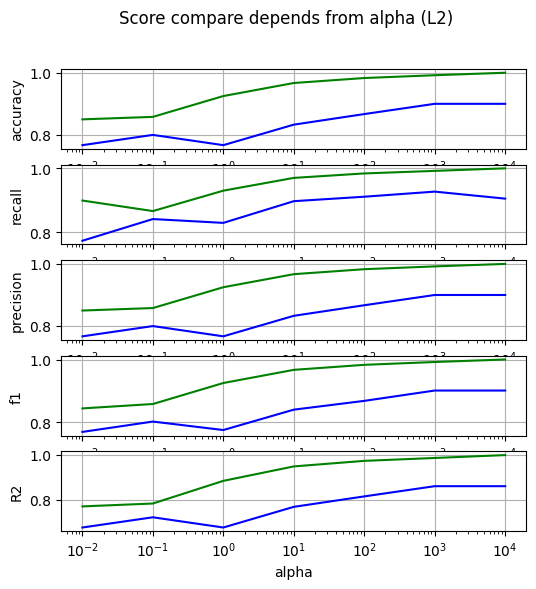

In [465]:
# нарисуем показатели в зависимости от коэффициента регуляризациим для (L2)
import matplotlib.pyplot as plt
columns_list = ['accuracy', 'recall', 'precision', 'f1', 'R2']
fig, ax = plt.subplots(nrows=len(columns_list), ncols=1, figsize=(6, 6))
fig.suptitle('Score compare depends from alpha (L2)')
for i, col in enumerate(columns_list):
    ax[i].plot(df_score_test['alpha'], df_score_test[col], 'b-')
    ax[i].plot(df_score_train['alpha'], df_score_train[col], 'g-')
    ax[i].set_xlabel('alpha')
    ax[i].set_ylabel(col)
    ax[i].grid()
    ax[i].set_xscale('log')
plt.show()

#### модель на тестовых данных (синяя) также показывает худшие результаты. при этом высокий коэффициент регуляризации (L1>1000) ухудшает показатели

Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

In [466]:
# обучение логистическая регрессия
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
Y_pred_train = log_reg.predict(X_train)
Y_pred_test = log_reg.predict(X_test)
scores_dict = dict({})
# Однократная оценка на тестовых данных
single_score = r2_score(Y_pred_test, y_test)
print("Однократная оценка эффективности (R^2):", single_score)
for i in range(3, 20):
    # 5-кратная кросс-валидация на всем датасете
    cross_val_scores = cross_val_score(log_reg, X, Y, cv=i, scoring='r2', )
    scores_dict[i] = cross_val_scores.mean()
    print(f"Среднее значение R^2 по {i}-кратной кросс-валидации:", cross_val_scores.mean())


Однократная оценка эффективности (R^2): 0.587426326129666
Среднее значение R^2 по 3-кратной кросс-валидации: 0.9298564786739437
Среднее значение R^2 по 4-кратной кросс-валидации: 0.9286858974358975
Среднее значение R^2 по 5-кратной кросс-валидации: 0.9400000000000001
Среднее значение R^2 по 6-кратной кросс-валидации: 0.9386792452830188
Среднее значение R^2 по 7-кратной кросс-валидации: 0.9298740772904905
Среднее значение R^2 по 8-кратной кросс-валидации: 0.9405487804878048
Среднее значение R^2 по 9-кратной кросс-валидации: 0.9278375149342892
Среднее значение R^2 по 10-кратной кросс-валидации: 0.93
Среднее значение R^2 по 11-кратной кросс-валидации: 0.9273636363636364
Среднее значение R^2 по 12-кратной кросс-валидации: 0.9385775862068965
Среднее значение R^2 по 13-кратной кросс-валидации: 0.9362348178137652
Среднее значение R^2 по 14-кратной кросс-валидации: 0.9287280701754385
Среднее значение R^2 по 15-кратной кросс-валидации: 0.92512077294686
Среднее значение R^2 по 16-кратной кросс-в

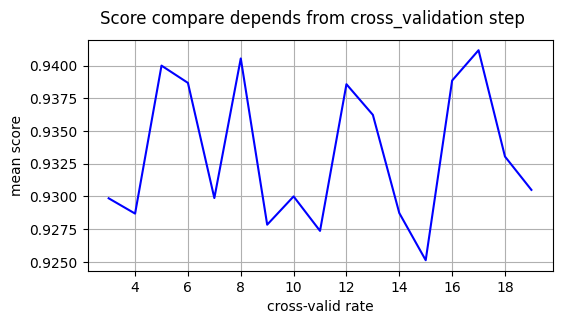

In [467]:
import matplotlib.pyplot as plt
df_scores2 = pd.DataFrame(columns = ['cv', 'score_mean'])
rows = []
for key, val in scores_dict.items():
    rows.append(dict({'cv': key, 'score_mean': val}))
df_scores2 = df_scores2.from_dict(rows)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
fig.suptitle('Score compare depends from cross_validation step')
ax.plot(df_scores2['cv'], df_scores2['score_mean'], 'b-')
ax.set_xlabel('cross-valid rate')
ax.set_ylabel('mean score')
ax.grid()
plt.show()

#### максимальные показатели при кроссвалидации с коэффициентом 8

3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?



для модели Логистической регрессии без регуляризации: {'accuracy': 0.867, 'recall': 0.911, 'precision': 0.867, 'f1': 0.868, 'R2': 0.814}

для модели Логистической регрессии регуляризация (L1) c=10: {'accuracy': 0.983, 'recall': 0.984, 'precision': 0.983, 'f1': 0.983, 'R2': 0.974}

для модели Логистической регрессии регуляризация (L2) c=1000: {'accuracy': 0.992, 'recall': 0.992, 'precision': 0.992, 'f1': 0.992, 'R2': 0.987}

### Регуляризация улучшает параметры модели, но необходимо очень внимательно подбирать параметры регуляризации





4. Отчёт.
— Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.

### лучший результат показывает модель с L2 регуляризацией, при этом коэффицент регуляризации должен быть большим alpha=1000, иначе модель очень быстро переобучается.
